In [1]:
##---------------------------------------
#  Creative Deep Learning Computer Vision
##---------------------------------------

## Load Packages

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
training_df = pd.read_csv("~/Box/Keenan.Viney/Desktop Backup/AT&T/Skunkworks/Computer_Vision/Training_Set_Dataframe.csv")

training_df.head()

,Unnamed: 0,File_Name,CID,CID_Join,Funnel,CTR,BFER,CVR,UF_CTR,MF_BFE,LF_CVR,Target,File_Path,Label,File_Path_Abs
0,1,I_ADD_DTN_001_HTM_CRS_300x250_S_N_EN_NA_EG-OTT...,NFLA001,NFLA001,Mid-Funnel,0.0005,0.11,0.02,-0.094486,-0.050285,0.876422,-0.050285,~/Desktop/Offline Images/Training_Set/I_ADD_DT...,Above,/Users/keenanv/Desktop/Offline Images/Training...
1,6,I_ADD_DTN_001_STB_CRS_300x250_S_N_EN_NA_EG-OTT...,NFLA001,NFLA001,Mid-Funnel,0.0005,0.11,0.02,-0.094486,-0.050285,0.876422,-0.050285,~/Desktop/Offline Images/Training_Set/I_ADD_DT...,Above,/Users/keenanv/Desktop/Offline Images/Training...
2,12,I_ADD_NFL_001_HTM_CRS_300x250_S_EN_NA_EG-OFFIN...,NFLEG23,NFLEG23,Upper Funnel,0.0011,0.03,0.00,1.118717,-0.818921,-0.876422,1.118717,~/Desktop/Offline Images/Training_Set/I_ADD_NF...,Above,/Users/keenanv/Desktop/Offline Images/Training...
3,14,I_ADD_NFL_001_HTM_CRS_300x250_S_N_EN_NA_EG-VID...,NFL02EG,NFL02EG,Lower Funnel,0.0004,0.10,0.01,-0.296687,-0.146364,0.000000,0.000000,~/Desktop/Offline Images/Training_Set/I_ADD_NF...,Above,/Users/keenanv/Desktop/Offline Images/Training...
4,15,I_ADD_NFL_001_HTM_CRS_300x250_S_N_EN_NA_EG-VID...,NFL03EG,NFL03EG,None,0.0000,0.00,0.00,-1.105489,-1.107160,-0.876422,0.000000,~/Desktop/Offline Images/Training_Set/I_ADD_NF...,Above,/Users/keenanv/Desktop/Offline Images/Training...


In [3]:
validation_df = pd.read_csv("~/Box/Keenan.Viney/Desktop Backup/AT&T/Skunkworks/Computer_Vision/Validation_Set_Dataframe.csv")

validation_df.head()

,Unnamed: 0,File_Name,CID,CID_Join,Funnel,CTR,BFER,CVR,UF_CTR,MF_BFE,LF_CVR,Target,File_Path,Label,File_Path_Abs
0,1,I_AEC_ECM_001_STB_DTP_300x250_S_N_EN_NA_EG-PST...,AARP004,AARP005,None,0.0000,0.00,0.00,-1.105489,-1.107160,-0.876422,0.000000,~/Desktop/Offline Images/Validation_Set/I_AEC_...,Above,/Users/keenanv/Desktop/Offline Images/Validati...
1,2,I_AEC_ECM_001_STB_DTP_300x250_S_N_EN_NA_EG-PST...,AARP004,AARP004,None,0.0000,0.00,0.00,-1.105489,-1.107160,-0.876422,0.000000,~/Desktop/Offline Images/Validation_Set/I_AEC_...,Above,/Users/keenanv/Desktop/Offline Images/Validati...
2,3,I_AEC_ECM_001_STB_DTP_300x250_S_N_EN_NA_EG-PST...,AARP005,AARP005,None,0.0000,0.00,0.00,-1.105489,-1.107160,-0.876422,0.000000,~/Desktop/Offline Images/Validation_Set/I_AEC_...,Above,/Users/keenanv/Desktop/Offline Images/Validati...
3,4,I_AEC_ECM_001_STB_DTP_300x250_S_N_EN_NA_EG-PST...,WIN003,WIN003,None,0.0000,0.00,0.00,-1.105489,-1.107160,-0.876422,0.000000,~/Desktop/Offline Images/Validation_Set/I_AEC_...,Above,/Users/keenanv/Desktop/Offline Images/Validati...
4,5,I_AEC_ECM_001_STB_DTP_300x250_S_N_EN_NA_EG-PST...,WIN0062,WIN0062,Mid-Funnel,0.0004,0.22,0.02,-0.296687,1.006591,0.876422,1.006591,~/Desktop/Offline Images/Validation_Set/I_AEC_...,Above,/Users/keenanv/Desktop/Offline Images/Validati...


In [4]:
## Import Data

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)



In [5]:
train_generator = train_datagen.flow_from_directory(directory = "/Users/keenanv/Desktop/Offline_Images/Training_Set/",
                                                    target_size = (250, 300),
                                                    classes = ("Above", "Below"),
                                                    class_mode = "binary", 
                                                    batch_size = 3)

validation_generator = test_datagen.flow_from_directory(directory = "/Users/keenanv/Desktop/Offline_Images/Validation_Set/",
                                                        target_size = (250, 300),
                                                        classes = ("Above", "Below"),
                                                        class_mode = "binary",
                                                        batch_size = 3)




Found 77 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
   print("data batch shape:", data_batch.shape)
   print("labels batch shape:", labels_batch.shape)
   break

data batch shape: (3, 250, 300, 3)
labels batch shape: (3,)


In [11]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation = "relu", input_shape = (250, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(665, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 248, 298, 8)       224       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 124, 149, 8)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 122, 147, 8)       584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 61, 73, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 59, 71, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 35, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 33, 32)        4640      
__________

In [12]:
model.compile(loss = "binary_crossentropy",
  optimizer = optimizers.RMSprop(lr = 1e-6),
  metrics = ["acc"])

In [15]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch = 11,
  epochs = 3,
  validation_data = validation_generator,
  validation_steps = 5
)

Epoch 1/3
11/11 [==============================] - 1s 95ms/step - loss: 0.6932 - acc: 0.5152 - val_loss: 0.6833 - val_acc: 0.6667
Epoch 2/3
11/11 [==============================] - 1s 72ms/step - loss: 0.6872 - acc: 0.5455 - val_loss: 0.6880 - val_acc: 0.4000
Epoch 3/3
11/11 [==============================] - 1s 83ms/step - loss: 0.7030 - acc: 0.4861 - val_loss: 0.6853 - val_acc: 0.5333


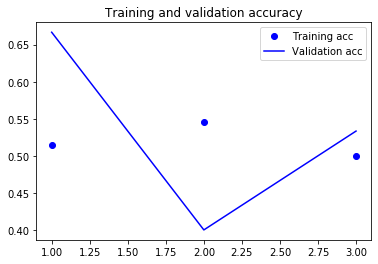

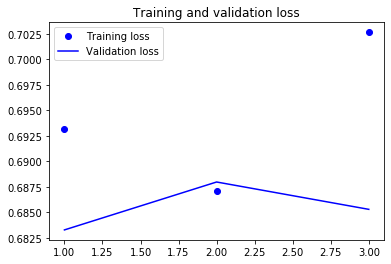

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
model.save("/Users/keenanv/Desktop/Offline_Images/POC_3epoch_R2.h5")

In [18]:
# Predict a new image

test_image_path = "/Users/keenanv/Desktop/Offline_Images/test_frame.jpg"

test_image = image.load_img(test_image_path, target_size = (250, 300)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = model.predict(test_image)

print(result)

[[7.9098056e-05]]
